# Using a GAP model

First fit a new potential using the `teach_sparse` program

In [1]:
%pylab inline
import numpy as np
import quippy
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
pot = quippy.Potential("",param_filename="gp_new.xml")
potSW = quippy.Potential("IP SW")
potSW2 = quippy.Potential("IP SW",param_filename="ip.parms.SW2.xml")
potSW3 = quippy.Potential("IP SW",param_filename="ip.parms.SW3.xml")

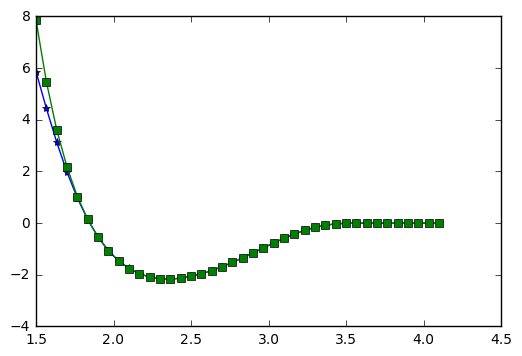

In [3]:
lattice = np.eye(3)*20.0
at = quippy.Atoms(n=2,lattice=lattice)
at.set_atoms([14 for i in range(at.n)])
at.pos[:,1] = [0.0, 0.0, 0.0]

GAP2bEnergy = []
SW2bEnergy = []
rs = np.linspace(1.5,4.1,40)
for r in rs:
    at.pos[:,2] = [r,0.0,0.0]
    pot.calc(at,energy=True,force=True)
    GAP2bEnergy.append(at.energy)
    potSW.calc(at,energy=True,force=True)
    SW2bEnergy.append(at.energy)
    
plt.plot(rs,GAP2bEnergy,"*-")
plt.plot(rs,SW2bEnergy,"s-")

In [4]:
pot.calc(at,energy=True,args_str="energy_per_coordinate")

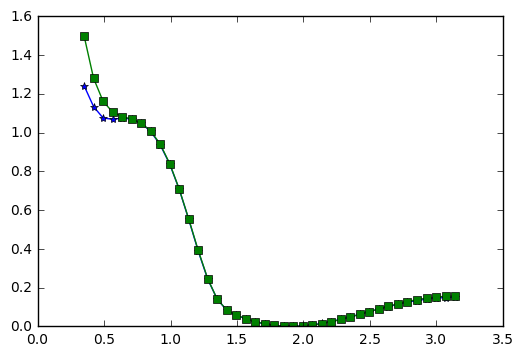

In [5]:
lattice = quippy.farray(np.eye(3)*20.0)
at = quippy.Atoms(n=3,lattice=lattice)
at.set_atoms([14 for i in range(at.n)])
at.pos[:,1] = quippy.farray([0.0,0.0,0.0])
at.pos[:,2] = quippy.farray([2.2,0.0,0.0])

r = 3.0

GAP3bEnergy = []
SW3bEnergy = []
angles = np.linspace(20.0,180.0,40) / 180.0 * np.pi
for a in angles:
    at.pos[:,3] = r*quippy.farray([np.cos(a),np.sin(a),0.0])
    
    pot.calc(at,energy=True,args_str="energy_per_coordinate")
    GAP3bEnergy.append(at.energy_per_coordinate[2])
    potSW3.calc(at,energy=True)
    SW3bEnergy.append(at.energy)
    
plt.plot(angles,GAP3bEnergy,"*-")
plt.plot(angles,SW3bEnergy,"s-")